In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worldwide-coffee-habits-dataset/worldwide_coffee_habits.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/worldwide-coffee-habits-dataset/worldwide_coffee_habits.csv')

In [4]:
df.head()

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262


In [5]:
df.duplicated().sum()


0

In [6]:
import seaborn as sns

<Axes: xlabel='Country', ylabel='count'>

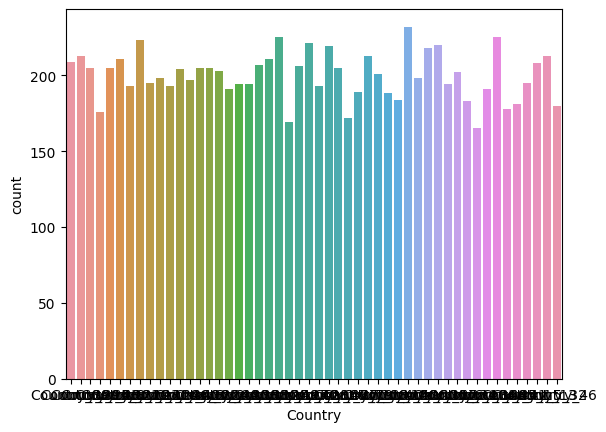

In [7]:
sns.countplot(x='Country', data=df)


<Axes: xlabel='Year'>

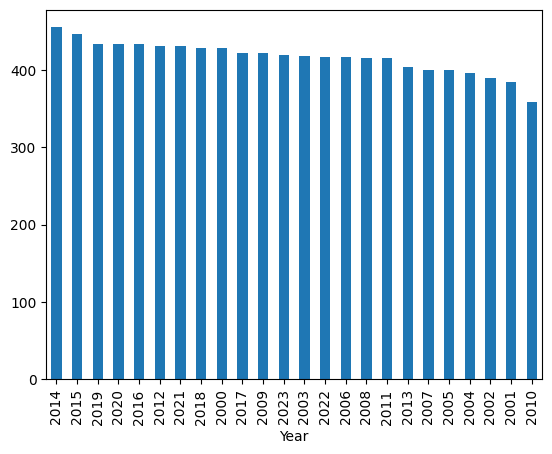

In [8]:

df['Year'].value_counts().plot(kind='bar')

In [9]:
import matplotlib.pyplot as plt


(array([ 980., 1053., 1021.,  993.,  983.,  955., 1046.,  997.,  997.,
         975.]),
 array([  1.0024937 ,  15.90182933,  30.80116495,  45.70050058,
         60.5998362 ,  75.49917183,  90.39850746, 105.29784308,
        120.19717871, 135.09651433, 149.99584996]),
 <BarContainer object of 10 artists>)

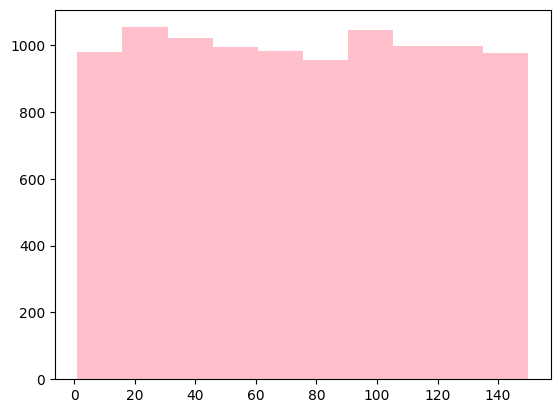

In [10]:
plt.hist(df['Population (millions)'], bins=10, color='Pink')

/tmp/ipykernel_18/2563156224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Coffee Consumption (kg per capita per year)'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Coffee Consumption (kg per capita per year)', ylabel='Density'>

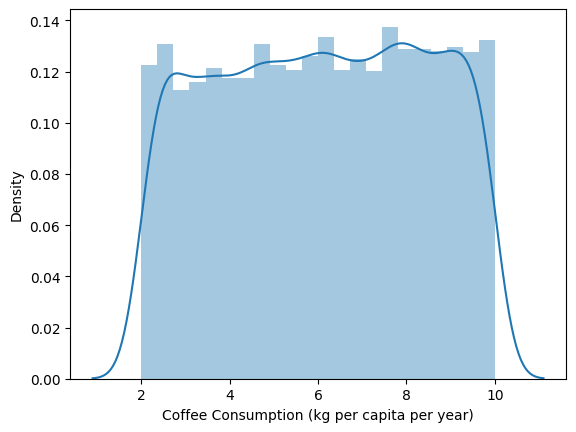

In [11]:
sns.distplot(df['Coffee Consumption (kg per capita per year)'])

In [12]:
import statsmodels.api as sm
import datetime
import seaborn as sns
def adjusted_boxplot_params(data:pd.Series):
    ''' 
    Returns:
    @outlier_range_lower: lower bound of normal expected values. Everything below are outlier candidates.
    @outlier_range_upper: upper bound of normal expected values. Above are outlier candidates.
    @whis: (lowWhis,highWhis) whis parameter for the boxplot method, in a form (low_percentage, high_percentage), as expected by pyplot.boxplot().
    '''

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range
    iqr = q3 - q1
    #calculate medcouple
    y = np.asarray(data, dtype=np.double) 
    MC = sm.stats.stattools.medcouple(y) 

    # Define the outlier range 
    if (MC>0):
        outlier_range_lower = q1 - 1.5 * np.exp(-4*MC) * iqr
        outlier_range_upper = q3 + 1.5 * np.exp(3*MC)  * iqr
    else:
        outlier_range_lower = q1 - 1.5 * np.exp(-3*MC) * iqr
        outlier_range_upper = q3 + 1.5 * np.exp(4*MC)  * iqr

    whis = np.interp([outlier_range_lower, outlier_range_upper], np.sort(data), np.linspace(0, 1, data.size)) * 100 #Ref: https://stackoverflow.com/a/65390045/7745170

    return outlier_range_lower, outlier_range_upper, whis 

<Axes: >

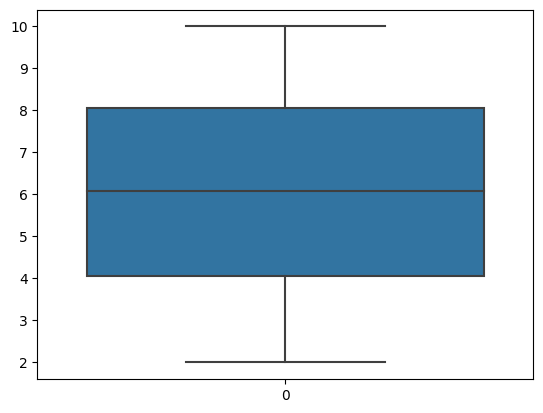

In [13]:
sns.boxplot(df['Coffee Consumption (kg per capita per year)'])

In [14]:
print(df['Coffee Consumption (kg per capita per year)'].skew())
df['Coffee Consumption (kg per capita per year)'].describe()

-0.03906367122514104


count    10000.000000
mean         6.061865
std          2.313427
min          2.000385
25%          4.070743
50%          6.094491
75%          8.061127
max          9.999399
Name: Coffee Consumption (kg per capita per year), dtype: float64

In [15]:
q_low = df['Coffee Consumption (kg per capita per year)'].quantile(0.01)
q_hi  = df['Coffee Consumption (kg per capita per year)'].quantile(0.99)

df_filtered = df[(df['Coffee Consumption (kg per capita per year)'] < q_hi) & (df['Coffee Consumption (kg per capita per year)'] > q_low)]

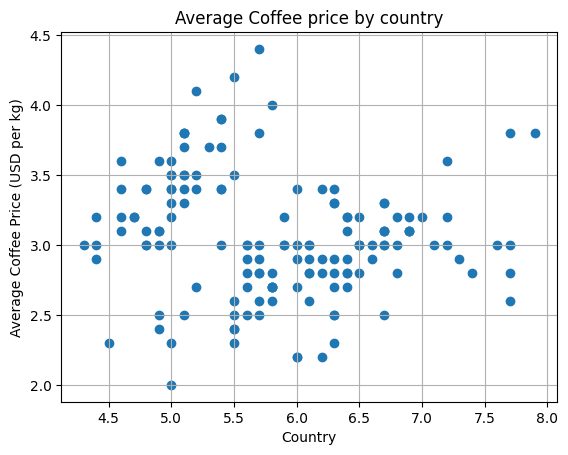

In [16]:
import matplotlib.pyplot as plt
# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
# Extract data for sepal length and petal length
sepal_length = iris.data[:, 0]
petal_length = iris.data[:, 1]
# Create the scatter plot
plt.scatter(sepal_length, petal_length)
# Add labels, title, and grid
plt.xlabel("Country")
plt.ylabel("Average Coffee Price (USD per kg)")
plt.title("Average Coffee price by country")
plt.grid(True)
# Show the plot
plt.show()


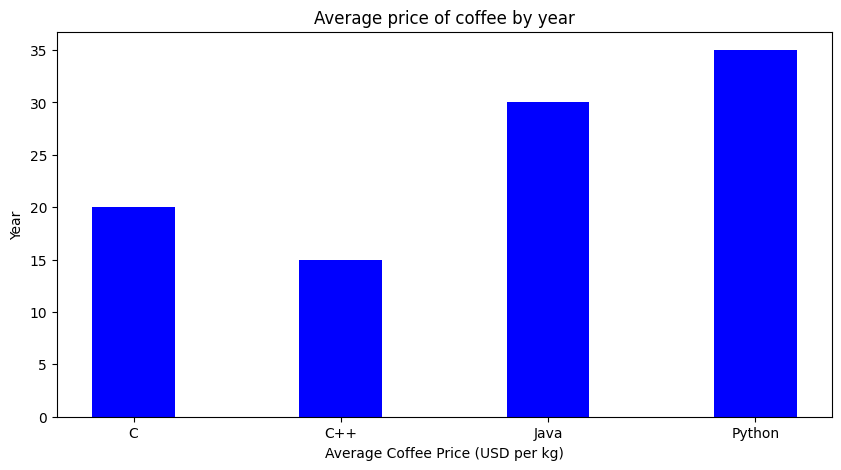

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

 
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30, 
        'Python':35}
courses = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='Blue', 
        width = 0.4)

plt.xlabel("Average Coffee Price (USD per kg)")
plt.ylabel("Year")
plt.title("Average price of coffee by year")
plt.show()

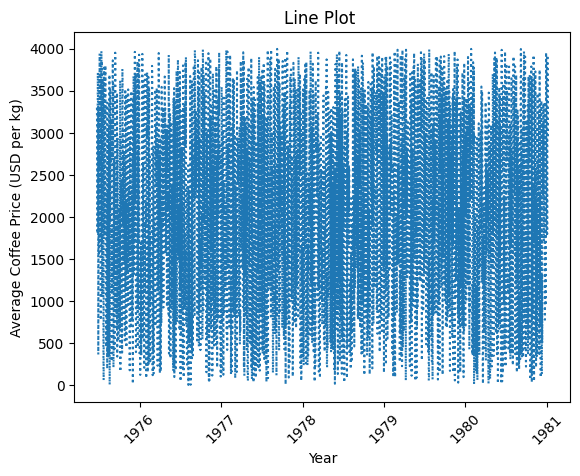

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.arange(2000, 2023 ,dtype='datetime64[D]')
y = np.random.randint(0, 4000, size=len(x))

# Create the line plot
plt.plot(x, y, linestyle = 'dotted')


# Add title and axis labels
plt.title('Line Plot ')
plt.xlabel('Year')
plt.ylabel("Average Coffee Price (USD per kg)")
plt.xticks(rotation=45)

# Display the plot
plt.show()

      
    

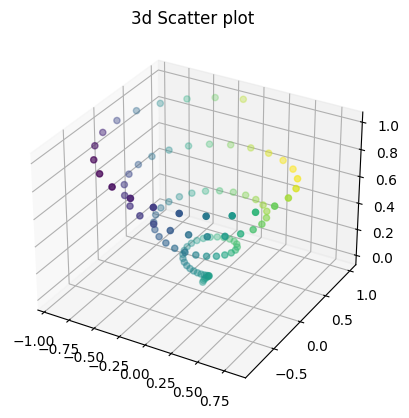

In [19]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
c = x + y
ax.scatter(x, y, z, c = c)

# syntax for plotting
ax.set_title('3d Scatter plot ')
plt.show()
